<a href="https://colab.research.google.com/github/PRAVSEN/Predict_Customer_Deposit_SuccessRate/blob/main/Predict_Customer_Deposit_SuccessRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**Per the UCI Link and information under the  Materials and Methods, the dataset represents around 17 distinct marketing campaigns**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
df.shape

# df.isnull().sum()

# # understand the term deposit conversion value count
df['y'].value_counts()
df['y'].value_counts(normalize=True) * 100

# # Result: We have around 88% of prospects who failed to turn into a customer. Hence this is a imbalanced dataset

# # Based on the analysis on the y feature based on month, May month looks like a outlier with too many rejections
monthwise_y_counts = df.groupby(['month', 'y']).size().unstack(fill_value=0)
print (monthwise_y_counts)



df.hist(figsize=(15,15))


corr = df.corr(numeric_only = True).round(2)
corr

(41188, 21)

In [ ]:
# converting y to numeric to identify correlation with other features

df['y'] = df['y'].map({'no': 0, 'yes': 1})


corr = df.corr(numeric_only = True).round(2)
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.00,-0.00,0.00,-0.03,0.02,-0.00,0.00,0.13,0.01,-0.02,0.03
duration,-0.00,1.00,-0.07,-0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.04,0.41
campaign,0.00,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,0.14,-0.07
pdays,-0.03,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.30,0.37,-0.32
previous,0.02,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.45,-0.50,0.23
emp.var.rate,-0.00,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.97,0.91,-0.30
cons.price.idx,0.00,0.01,0.13,0.08,-0.20,0.78,1.00,0.06,0.69,0.52,-0.14
cons.conf.idx,0.13,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.28,0.10,0.05
euribor3m,0.01,-0.03,0.14,0.30,-0.45,0.97,0.69,0.28,1.00,0.95,-0.31
nr.employed,-0.02,-0.04,0.14,0.37,-0.50,0.91,0.52,0.10,0.95,1.00,-0.35


In [ ]:
# Understand Categorical and numerical columns

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

Numerical Columns:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


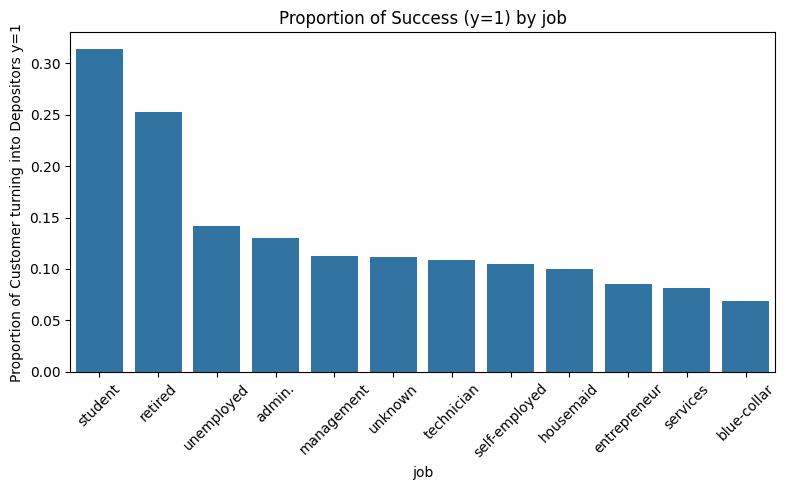

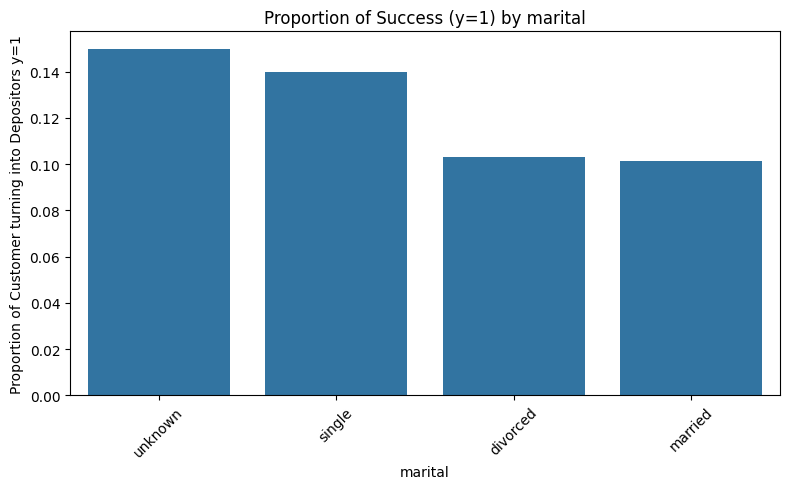

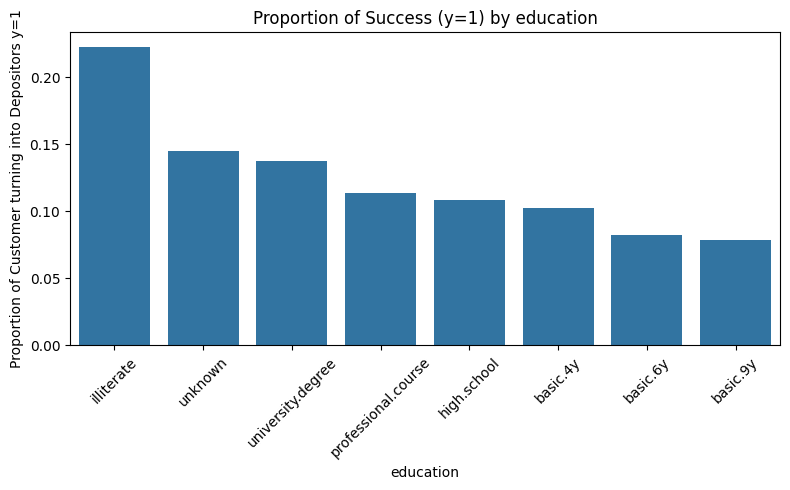

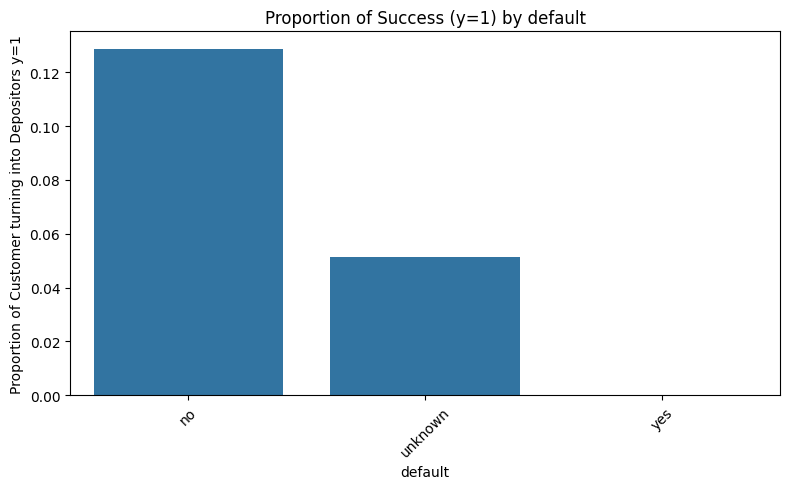

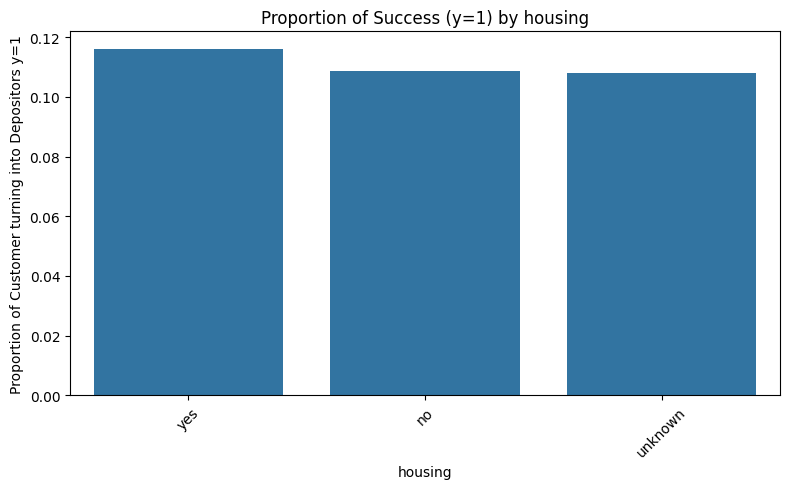

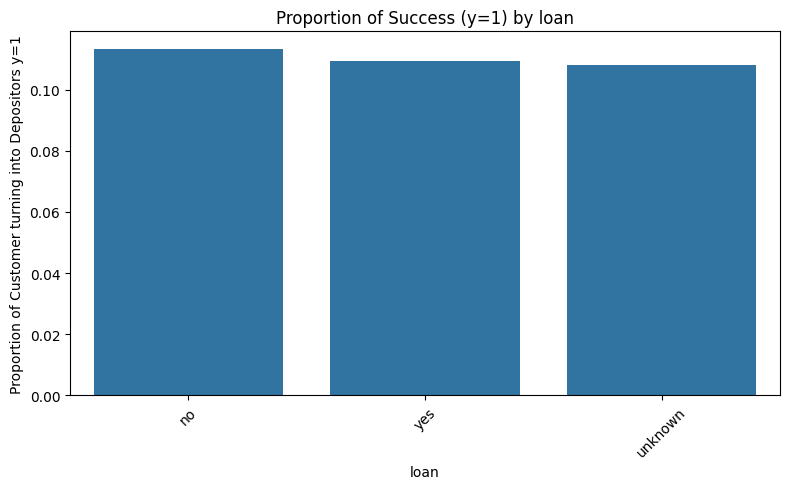

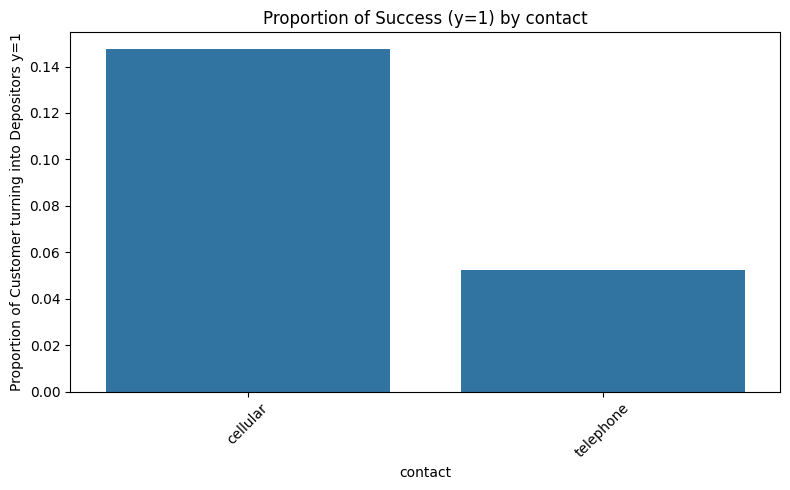

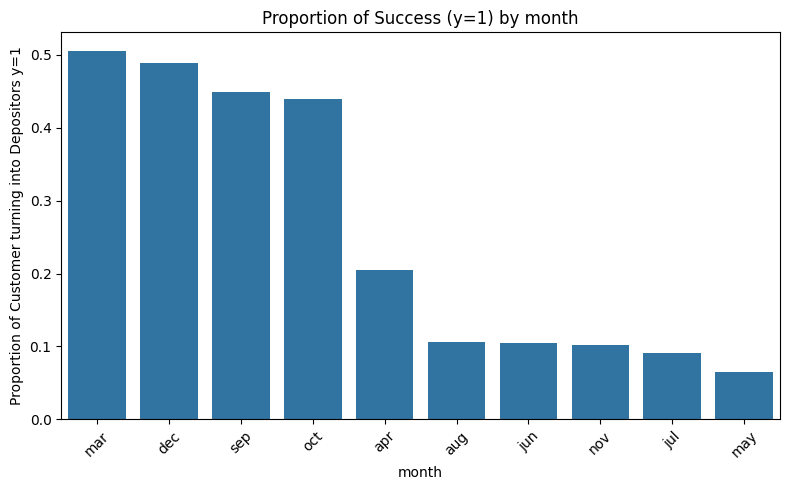

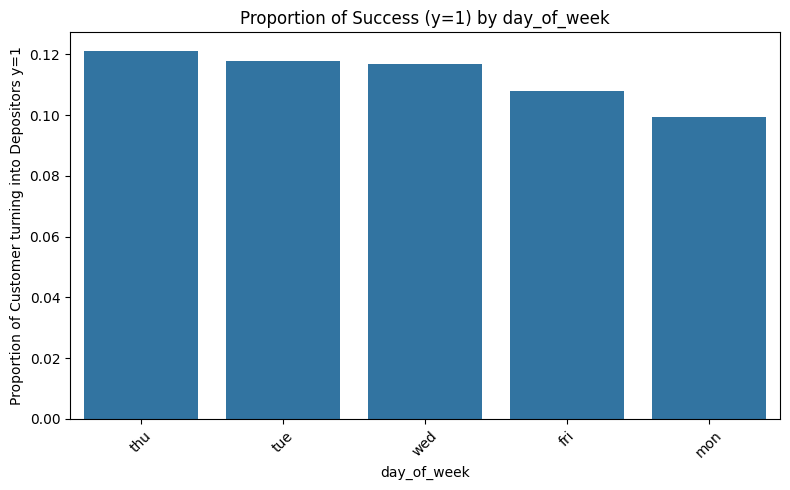

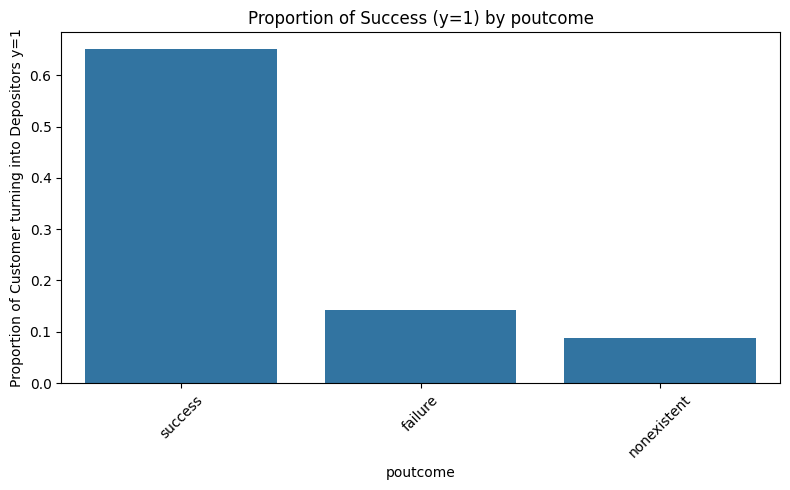

In [ ]:
# Understand relationship between the Categorical columns with the success turnover

for col in categorical_columns:
    prop_df = df.groupby(col)['y'].mean().reset_index()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='y', data=prop_df, order=prop_df.sort_values('y', ascending=False)[col])
    plt.title(f"Proportion of Success (y=1) by {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Proportion of Customer turning into Depositors y=1")
    plt.tight_layout()
    plt.savefig(f"data/proportion_y1_{col}.png", dpi=300)
    plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Develop a predictive model that explains the success of a bank's direct marketing specifically, whether a client subscribes to a term deposit**

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

import time


In [ ]:
# Encode Categorical Features

# Define features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Encode the target variable # 'yes' → 1, 'no' → 0
le = LabelEncoder()
y = le.fit_transform(y)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

To Establish the baseline performance i am using the dummy regressor model

In [ ]:
# Encode target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Use only bank client features for simplicity
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
X = df[features]
y = df['y']


In [ ]:
dummy = DummyClassifier(strategy='most_frequent')  # or 'stratified', 'uniform', etc.
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Baseline accuracy using DummyClassifier: {accuracy:.4f}")
print(f"Baseline recall using DummyClassifier: {recall:.4f}")

Baseline accuracy using DummyClassifier: 0.8865
Baseline recall using DummyClassifier: 0.0000


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
X = df[features]
y = df['y']

In [ ]:
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target variable
y = LabelEncoder().fit_transform(y)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Logistic Regression Recall: {recall:.4f}")

Logistic Regression Accuracy: 0.8865
Logistic Regression Recall: 0.0000


### Problem 9: Score the Model

What is the accuracy of your model?

**The Accuracy of the Basic Logistic regression Model is similar to Dummy Regression for accuracy and recall. This is due to the dataset which is imbalanced**

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
# Select bank client features
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

X = df[features]
y = df['y']

# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target variable
y = LabelEncoder().fit_transform(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# default settings for each of the models, fit and score each
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}


In [ ]:
results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    results.append({
        'Model': name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': round(train_accuracy, 4),
        'Test Accuracy': round(test_accuracy, 4)
    })


In [ ]:
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression      0.4158          0.8876         0.8865
1                  KNN      0.0906          0.8902         0.8721
2        Decision Tree      0.0858          0.9166         0.8626
3                  SVM     13.8317          0.8876         0.8865


Based on the Above Table we conclude the following

1. SVM takes a long time to train with the dataset however performs consistently with both Test and Training data
2. Basic Logistic Regression does consistently with both the Training and Test Data
3. Overall Decision Tree does best in Training Accuracy but when it comes to Test Data (unseen data) it performs lower but also does it with a short training time.
4. KNN does well wit Training and performs low in Test.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**The Question about Gender is not valid as we dont have Gender field in the Dataset**


**HyperParameter Tuning:**

In [ ]:
# Define features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Encode the target variable # 'yes' → 1, 'no' → 0
le = LabelEncoder()
y = le.fit_transform(y)

# Define column types from X only
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Define the models and hyperparameters
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(class_weight='balanced', max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(class_weight='balanced'), {'decisiontreeclassifier__max_depth': [5, 10]})
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)

    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

    # Get the best estimator
    best_model = grid_search.best_estimator_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, zero_division=0)
    precision = precision_score(y_test, y_pred,zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Append the results
    results.append([name, train_score, test_score, fit_time, accuracy])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['model', 'train score', 'test score', 'average fit time', 'accuracy'])
results_df.set_index('model', inplace=True)

# Save to JSON (for submission if needed)
results_df.to_json('data/model_results_balanced.json')


In [ ]:

df = pd.read_json(r'data/model_results_balanced.json')
df

,train score,test score,average fit time,accuracy
knn,0.924219,0.904467,9.283455,0.825686
logisticregression,0.860819,0.861496,2.239483,0.825686
svc,0.921700,0.911143,189.308978,0.825686
decisiontreeclassifier,0.882458,0.857611,1.553166,0.825686


In [ ]:
import matplotlib.pyplot as plt
import os

# Ensure the folder exists
os.makedirs('data', exist_ok=True)

# Define unique colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Extend this list if you have more models

# Plot only the 'test score' column with individual colors
ax = results_df.plot(
    kind='bar',
    figsize=(20, 15),
    color=colors,
    edgecolor='black'
)

# Customize the plot
plt.title('Model Test Scores')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('data/model_test_scores.png')
plt.close()

**Confusion** **Matrix**

In [ ]:
# Select features and target
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
X = df[features]
y = df['y']

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    X.loc[:, col] = LabelEncoder().fit_transform(X[col])

# Encode target
y = LabelEncoder().fit_transform(y)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


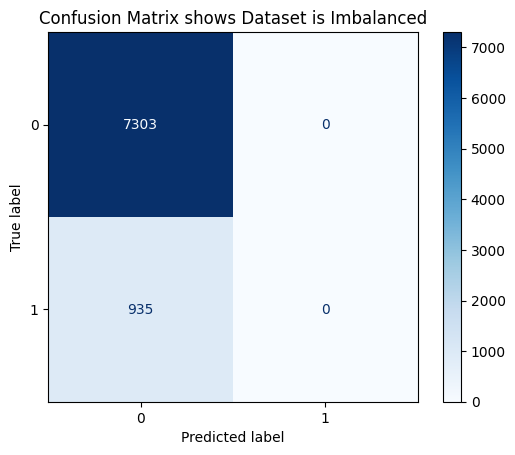

In [ ]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix shows Dataset is Imbalanced")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model with class_weight='balanced'
model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)


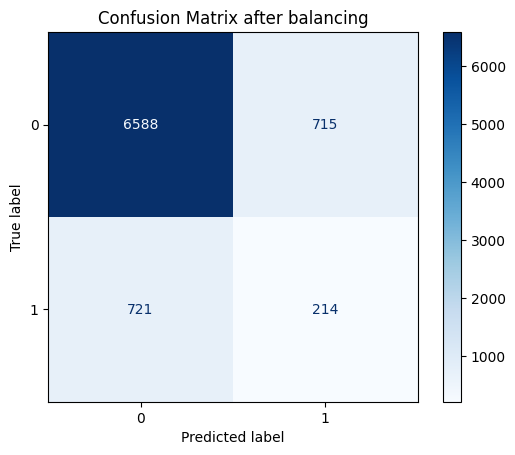

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix after balancing")
plt.show()

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10, 15],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Accuracy: 0.826
Precision: 0.230
Recall: 0.229
F1 Score: 0.230


# Bank Marketing Campaign Analysis (`bank-additional-full` Dataset)

## Dataset Overview

This dataset, sourced from the UCI Machine Learning Repository, contains data from 17 distinct marketing campaigns conducted by a Portuguese bank. The objective is to predict whether a customer will subscribe to a term deposit (`y = yes`).

- Total records: 41,888
- Features: 21
- Missing values: None
- Target variable: `y` (binary classification: `yes` or `no`)

## Exploratory Data Analysis

- **Monthly Trends**:
  - The month of May shows an unusually high number of rejections (~12,000), which may indicate an outlier. However, confirmation would require historical data from previous years.

- **Correlation Insights**:
  - The features `duration` and `previous` exhibit a strong positive correlation with successful outcomes.

- **Categorical Feature Observations**:
  - Higher success rates were observed among:
    - Students
    - Individuals with no formal education or degree
    - Customers contacted via cellphone
    - Customers with positive outcomes in previous campaigns

## Model Engineering

### Class Imbalance

- The dataset is highly imbalanced:
  - Approximately 12% of customers subscribed (`y = yes`)
  - The majority class (`y = no`) dominates, which can lead to misleading accuracy metrics

### Baseline Model

- A dummy regressor was used with an 80/20 train-test split
- Accuracy: 88.65%

### Logistic Regression (Basic)

- Applied without hyperparameter tuning
- Accuracy remained at 88.65%, matching the baseline

### Model Comparisons

| Model                  | Train Accuracy | Test Accuracy | Notes                          |
|-----------------------|----------------|---------------|--------------------------------|
| Logistic Regression   | High           | High          | Consistent performance         |
| K-Nearest Neighbors   | High           | Lower         | Overfits training data         |
| Decision Tree         | Very High      | Lower         | Fast training, poor generalization |
| Support Vector Machine| High           | High          | Long training time, consistent |

### Hyperparameter Tuning

- Various tuning attempts did not yield significant improvements
- The class imbalance remained a limiting factor

## Confusion Matrix and Balancing

- Confusion matrix analysis revealed a high number of false negatives for the minority class (`y = yes`)
- Class balancing techniques were applied:
  - Accuracy decreased slightly
  - Recall and F1-score improved, indicating better performance on the minority class

## Conclusion

- A model trained on the original dataset tends to predict `no` for most cases, achieving high accuracy but offering limited business value
- The minority class (`y = yes`) represents the true business objective: identifying potential subscribers
- Key metrics to prioritize:
  - **Recall**: Ensures more potential subscribers are identified
  - **Precision**: Reduces false positives and minimizes wasted effort
  - **F1-score**: Balances precision and recall for effective targeting

Sacrificing a small amount of accuracy to improve recall and F1-score leads to more effective marketing strategies, better targeting of potential customers, and higher conversion rates.

## Repository Structure



##### Questions